##  Model_8
<p>In this notebook I am using the CatBoost model</p>

In [14]:
# Loading the dataset
import pandas as pd
data = pd.read_csv("/home/kenbaker-gif/ML-Projects/Boston/data/train.csv")
data_2 = pd.read_csv("/home/kenbaker-gif/ML-Projects/Boston/data/test.csv")

In [15]:
from sklearn.model_selection import train_test_split
X = data.drop('medv', axis=1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from catboost import CatBoostRegressor, CatBoostClassifier

# Example: Regression
cat_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.11,
    depth=3,
    verbose=0  # suppress output
)
cat_model.fit(X_train_scaled, y_train)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = cat_model.predict(X_test_scaled)
print(f"MSE:---> {mean_squared_error(y_test, y_pred)}")
print(f"r2Score:---> {r2_score(y_test, y_pred)}")

MSE:---> 6.655949336925145
r2Score:---> 0.9260436783833274


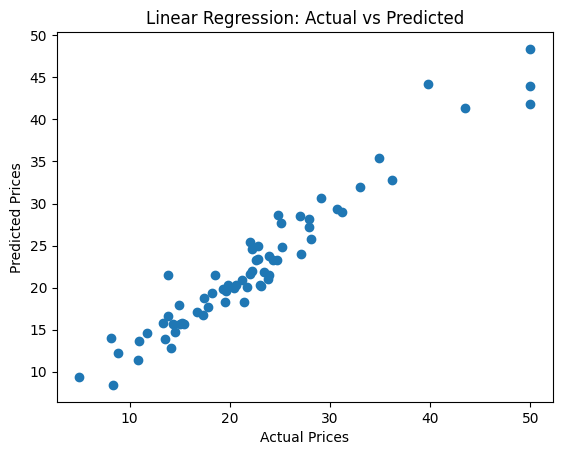

In [20]:
# Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()